In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/R04_25")
# dataset = pd.read_csv("./R04_25")


In [6]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [7]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-5.0,2.0,37.0,39.0,30.0,26.0,-16.0,-14.0,4.0,18.0,...,-8.0,-35.0,-45.0,-66.0,-39.0,-33.0,-48.0,-39.0,-39.0,0
1,-12.0,-24.0,1.0,-2.0,-15.0,-22.0,-55.0,-36.0,-27.0,-25.0,...,-40.0,-68.0,-65.0,-84.0,-52.0,-21.0,-42.0,-31.0,-34.0,0
2,-77.0,-78.0,-59.0,-65.0,-63.0,-55.0,-67.0,-88.0,-71.0,-65.0,...,-22.0,-50.0,-35.0,-48.0,-18.0,-20.0,-42.0,-29.0,-27.0,0
3,-66.0,-67.0,-50.0,-65.0,-60.0,-55.0,-68.0,-62.0,-53.0,-54.0,...,-60.0,-78.0,-64.0,-68.0,-41.0,-44.0,-62.0,-34.0,-43.0,0
4,-45.0,-55.0,-33.0,-53.0,-54.0,-63.0,-83.0,-52.0,-50.0,-53.0,...,-55.0,-70.0,-54.0,-63.0,-37.0,-60.0,-70.0,-34.0,-45.0,0


In [8]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns={"label"})
Y = dataset['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [9]:
train_accuracies = []

In [14]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128,kernel_size=3,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [16]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)
    train_accuracies.append(history.history['accuracy'][0])



epoch 1/100
12330/12330 [==============================] - 60s 5ms/step - loss: 0.9196 - accuracy: 0.5632
epoch 2/100
12330/12330 [==============================] - 60s 5ms/step - loss: 0.7772 - accuracy: 0.6416
epoch 3/100
12330/12330 [==============================] - 59s 5ms/step - loss: 0.7128 - accuracy: 0.6718
epoch 4/100
12330/12330 [==============================] - 59s 5ms/step - loss: 0.6743 - accuracy: 0.6895
epoch 5/100
12330/12330 [==============================] - 58s 5ms/step - loss: 0.6505 - accuracy: 0.6998
epoch 6/100
12330/12330 [==============================] - 59s 5ms/step - loss: 0.6321 - accuracy: 0.7079
epoch 7/100
12330/12330 [==============================] - 59s 5ms/step - loss: 0.6182 - accuracy: 0.7149
epoch 8/100
12330/12330 [==============================] - 58s 5ms/step - loss: 0.6064 - accuracy: 0.7198
epoch 9/100
12330/12330 [==============================] - 56s 5ms/step - loss: 0.5956 - accuracy: 0.7243
epoch 10/100
12330/12330 [====================

In [17]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.6876
Test Accuracy: 0.7294


In [18]:
print(train_accuracies)

[0.5632349848747253, 0.6416032910346985, 0.6718116402626038, 0.6895225048065186, 0.6998149752616882, 0.7079379558563232, 0.7149381637573242, 0.7198043465614319, 0.7242903709411621, 0.7280996441841125, 0.7317999601364136, 0.7344180941581726, 0.7377559542655945, 0.7406275272369385, 0.7427159547805786, 0.7446395754814148, 0.7460867762565613, 0.7479851245880127, 0.7497643232345581, 0.751629650592804, 0.7528969049453735, 0.7540323138237, 0.7551373839378357, 0.7558267712593079, 0.7571294903755188, 0.7583966851234436, 0.7594282031059265, 0.760046660900116, 0.7603482604026794, 0.7612707614898682, 0.7622237205505371, 0.7630829215049744, 0.7637646794319153, 0.7645376920700073, 0.7652245759963989, 0.7656782269477844, 0.7663828134536743, 0.7668415307998657, 0.767581582069397, 0.7680225968360901, 0.7679896354675293, 0.7682456374168396, 0.7689350247383118, 0.7698195576667786, 0.7693151831626892, 0.7695331573486328, 0.7699640393257141, 0.7708383798599243, 0.7699614763259888, 0.7703365683555603, 0.771

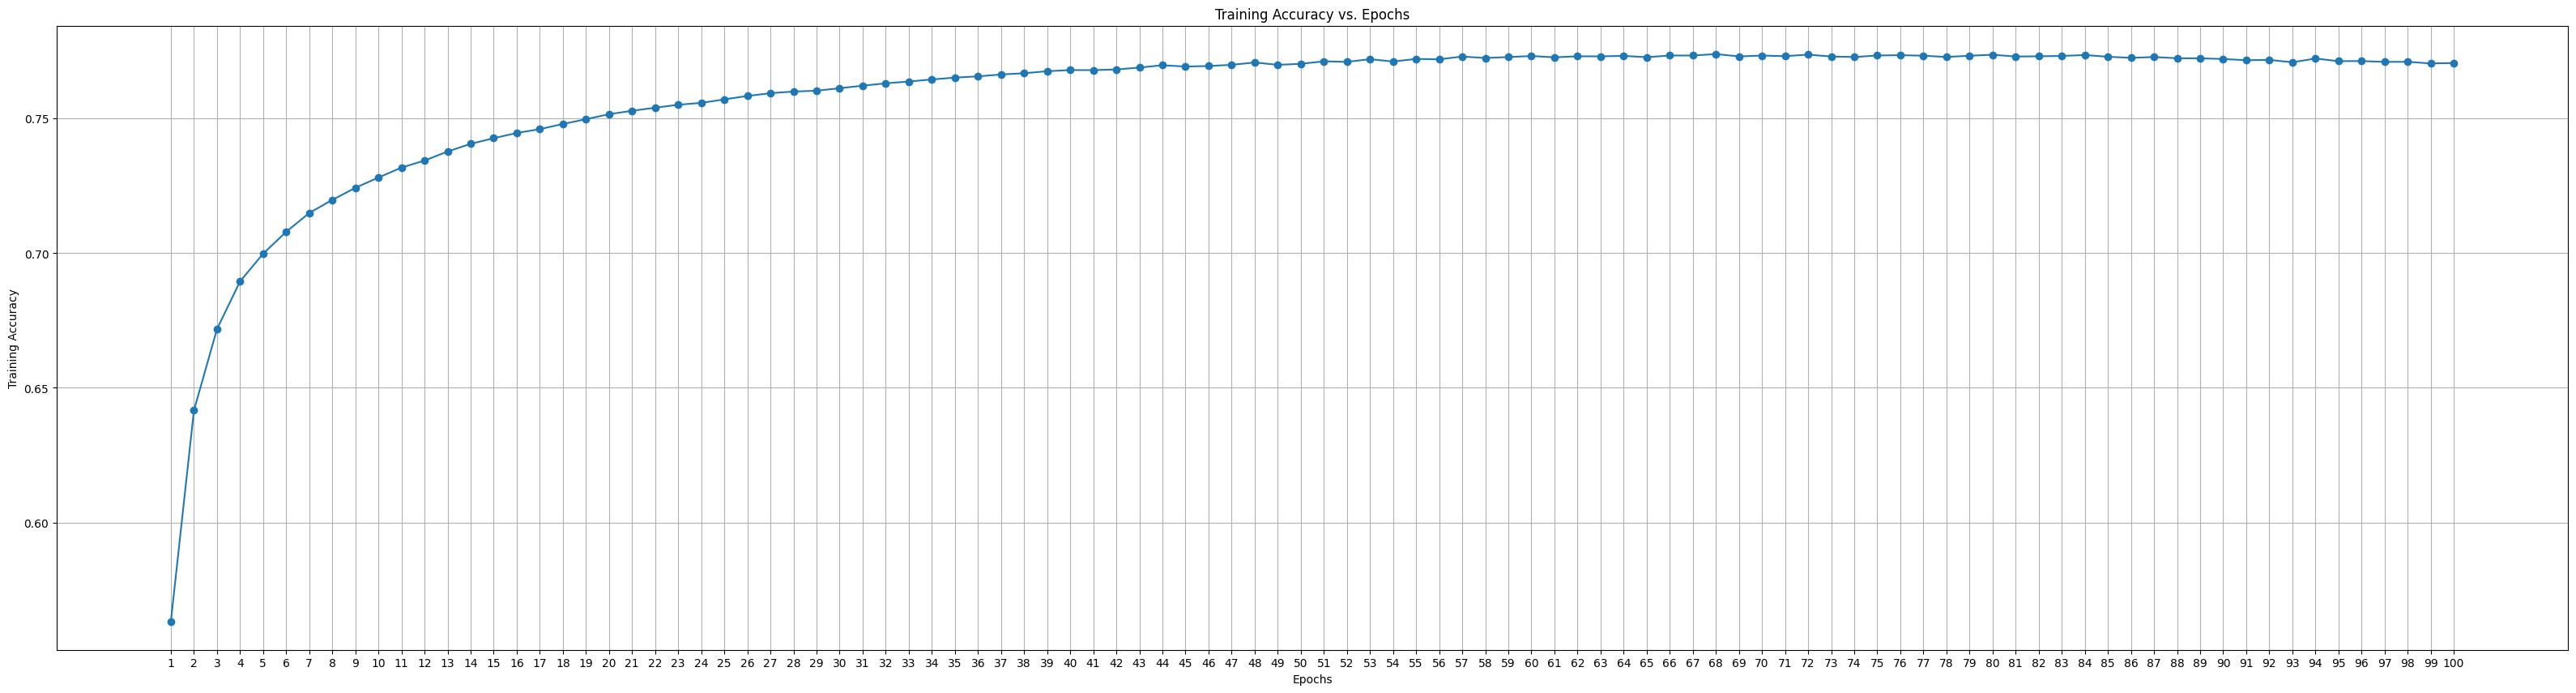

In [19]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()

In [20]:
print(sum(train_accuracies))

75.8391981124878


In [21]:
print(max(train_accuracies))

0.7739558219909668
